### Data collection and Information gathering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [3]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status',
           'occupation','relationship','race','sex','capital-gain','capital-loss',
           'hours-per-week','native-country','salary']

In [4]:
data = pd.read_csv(url,names=columns)

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.shape

(32561, 15)

### Data Preprocessing

In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [11]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
data.replace(' ?',np.nan,inplace=True)

In [13]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

#### Salary

In [14]:
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
data['salary'].replace({' <=50K':0, " >50K":1},inplace = True)

<AxesSubplot:xlabel='salary', ylabel='count'>

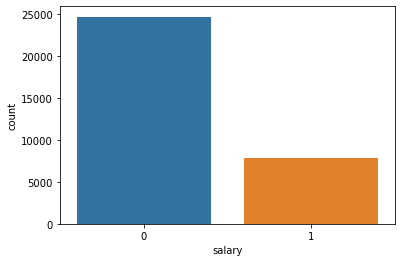

In [17]:
sns.countplot(x=data['salary'])

#### Workclass

In [18]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [19]:
data['workclass'].replace(' Without-pay', ' Never-worked' ,inplace=True)

In [20]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: workclass, dtype: int64

In [24]:
data['workclass'].fillna(0,inplace=True)

In [25]:
data['workclass'].isnull().sum()

0

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, '0'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Never-worked')])

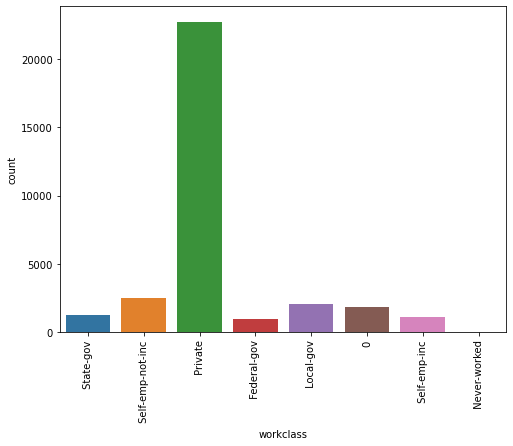

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['workclass'])
plt.xticks(rotation=90)

#### Final weight

In [28]:
data['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64

In [29]:
data['fnlwgt'] = data['fnlwgt'].apply(lambda x: np.log1p(x))

In [30]:
data['fnlwgt'].value_counts()

11.720037    13
12.223367    13
12.008786    13
11.911675    12
11.638368    12
             ..
10.296138     1
12.975060     1
11.613558     1
11.564835     1
11.596200     1
Name: fnlwgt, Length: 21648, dtype: int64

#### Education

In [31]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [32]:
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [37]:
"""
This function takes all the subcategories from Education category
till 12th and groups them into single category 'Primary'
"""

def func_primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary Edu.'
    else:
        return x

In [34]:
data['education'] = data['education'].apply(func_primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, 'Primary Edu.'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' Some-college'),
  Text(5, 0, ' Assoc-acdm'),
  Text(6, 0, ' Assoc-voc'),
  Text(7, 0, ' Doctorate'),
  Text(8, 0, ' Prof-school'),
  Text(9, 0, ' Preschool')])

<Figure size 576x432 with 0 Axes>

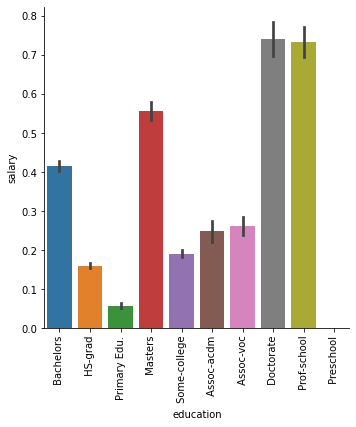

In [36]:
plt.figure(figsize=(8,6))
sns.catplot(x='education',y='salary',data=data,kind='bar')
plt.xticks(rotation=90)

#### Marital Status

In [39]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [41]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [42]:
data['marital-status'].replace(' Married-civ-spouse', ' Married-AF-spouse',inplace=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-AF-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Widowed')])

<Figure size 576x432 with 0 Axes>

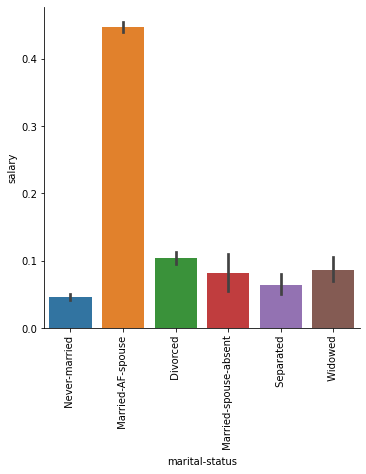

In [44]:
plt.figure(figsize=(8,6))
sns.catplot(x='marital-status',y='salary',data=data,kind='bar')
plt.xticks(rotation=90)

#### Occupation

In [45]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [46]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [47]:
data['occupation'].isnull().sum()

1843

In [48]:
data['occupation'].fillna(0,inplace=True)

In [49]:
data['occupation'].isnull().sum()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, '0'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv')])

<Figure size 576x432 with 0 Axes>

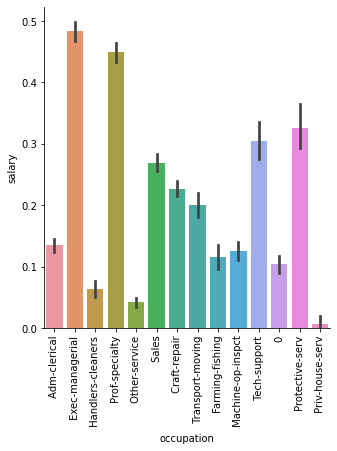

In [55]:
plt.figure(figsize=(8,6))
sns.catplot(x='occupation',y='salary',data=data,kind='bar')
plt.xticks(rotation=90)

In [52]:
data['occupation'].replace(' Armed-Forces', 0, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, '0'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv')])

<Figure size 576x432 with 0 Axes>

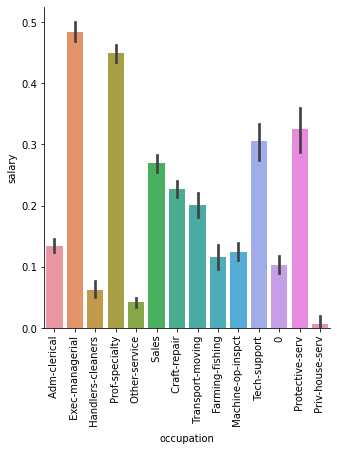

In [56]:
plt.figure(figsize=(8,6))
sns.catplot(x='occupation',y='salary',data=data,kind='bar')
plt.xticks(rotation=90)

#### Relationship

In [57]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [58]:
data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

#### Race

In [59]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [60]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

#### Sex

In [61]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [62]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [63]:
data['sex'] = pd.get_dummies(data['sex'],drop_first=True)

In [64]:
data['sex'].unique()

array([1, 0], dtype=uint8)

#### Native Country

In [66]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [68]:
"""
This function groups the subcategories into bigger sub-categories
"""

def native_country(country):
    if country in [' United-States', ' Canada']:
        return "North_America"
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',
                     ' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return "Central_America"
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',
                     ' Outlying-US(Guam-USVI-etc)']:
        return "South_America"
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',
                     ' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',
                     ' Holand-Netherlands']:
        return "Europe"
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',
                     ' Laos',' Philippines',' Taiwan']:
        return "Asia"
    else:
        return country

In [69]:
data['native-country'] = data['native-country'].apply(native_country)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'North_America'),
  Text(1, 0, 'Central_America'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'South_America'),
  Text(4, 0, 'Europe')])

<Figure size 576x432 with 0 Axes>

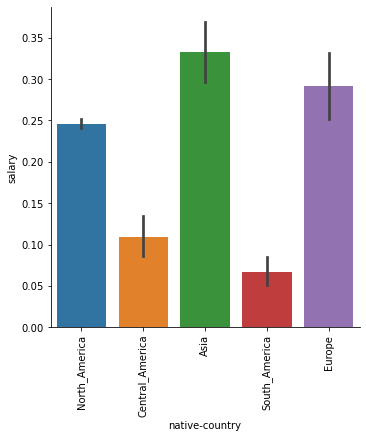

In [71]:
plt.figure(figsize=(8,6))
sns.catplot(x='native-country',y='salary',data=data,kind='bar')
plt.xticks(rotation=90)

<AxesSubplot:>

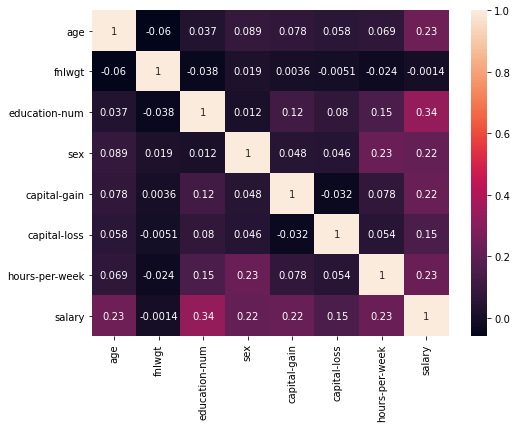

In [72]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

__As fnlwgt has very less correlation we can drop it.__

In [74]:
data.drop('fnlwgt',axis=1,inplace=True)

In [75]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,North_America,0
1,50,Self-emp-not-inc,Bachelors,13,Married-AF-spouse,Exec-managerial,Husband,White,1,0,0,13,North_America,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,North_America,0
3,53,Private,Primary Edu.,7,Married-AF-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,North_America,0
4,28,Private,Bachelors,13,Married-AF-spouse,Prof-specialty,Wife,Black,0,0,0,40,Central_America,0


### Train and Test split

In [76]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [79]:
X = pd.get_dummies(X)

In [80]:
X.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native-country_Asia,native-country_Central_America,native-country_Europe,native-country_North_America,native-country_South_America
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,38,9,1,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,53,7,1,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,28,13,0,0,0,40,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

In [82]:
X_scaled_data

array([[ 0.03067056,  1.13473876,  0.70307135, ..., -0.12751833,
         0.33412331, -0.17070808],
       [ 0.83710898,  1.13473876,  0.70307135, ..., -0.12751833,
         0.33412331, -0.17070808],
       [-0.04264203, -0.42005962,  0.70307135, ..., -0.12751833,
         0.33412331, -0.17070808],
       ...,
       [ 1.42360965, -0.42005962, -1.42233076, ..., -0.12751833,
         0.33412331, -0.17070808],
       [-1.21564337, -0.42005962,  0.70307135, ..., -0.12751833,
         0.33412331, -0.17070808],
       [ 0.98373415, -0.42005962, -1.42233076, ..., -0.12751833,
         0.33412331, -0.17070808]])

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.33, random_state=100)

In [84]:
print("Train:",X_train.shape)
print("Test:",X_test.shape)

Train: (21815, 60)
Test: (10746, 60)


### Training Model

#### Logisitic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\prati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
log_reg.score(X_test, y_test)

0.8534338358458962

__Hyperparameter Tuning__

In [100]:
parameters = dict(C=np.logspace(0, 4, 10), penalty=['l1', 'l2'], 
                  random_state=[0])

In [101]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(log_reg, param_grid=parameters, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.0s finished
C:\Users\prati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'random_state': [0]},
             verbose=3)

In [104]:
grid_search.best_params_

{'C': 1291.5496650148827, 'penalty': 'l2', 'random_state': 0}

In [106]:
log_reg_hyper = LogisticRegression(C=1291.5496650148827,penalty='l2',random_state=0)
log_reg_hyper.fit(X_train, y_train)

C:\Users\prati\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1291.5496650148827, random_state=0)

In [170]:
log_reg_score = log_reg_hyper.score(X_test, y_test)

In [171]:
log_reg_score

0.8534338358458962

__Evaluating Model__

In [109]:
log_reg_y_predicted = log_reg_hyper.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc
print("Accuracy_Score: {}".format(accuracy_score(y_test, log_reg_y_predicted)))
print('*'*50)
print("Classification_Report: {}".format(classification_report(y_test, log_reg_y_predicted)))
print('*'*50)
print("Confusion_Matrix: {}".format(confusion_matrix(y_test, log_reg_y_predicted)))

Accuracy_Score: 0.8534338358458962
**************************************************
Classification_Report:               precision    recall  f1-score   support

           0       0.88      0.93      0.91      8176
           1       0.73      0.61      0.67      2570

    accuracy                           0.85     10746
   macro avg       0.81      0.77      0.79     10746
weighted avg       0.85      0.85      0.85     10746

**************************************************
Confusion_Matrix: [[7604  572]
 [1003 1567]]


#### Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
dt_classifier_predict = dt_classifier.predict(X_test)

In [114]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, dt_classifier_predict)))
print('*'*50)
print("Classification_Report: {}".format(classification_report(y_test, dt_classifier_predict)))
print('*'*50)
print("Confusion_Matrix: {}".format(confusion_matrix(y_test, dt_classifier_predict)))

Accuracy_Score: 0.819002419504932
**************************************************
Classification_Report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88      8176
           1       0.62      0.62      0.62      2570

    accuracy                           0.82     10746
   macro avg       0.75      0.75      0.75     10746
weighted avg       0.82      0.82      0.82     10746

**************************************************
Confusion_Matrix: [[7202  974]
 [ 971 1599]]


__Hyperparameter Tuning__

In [117]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,16,2),
    'min_samples_leaf' : range(1,10),
    'min_samples_split': range(2,10),
    'splitter' : ['best', 'random']
    
}

In [118]:
grid_search = GridSearchCV(dt_classifier, param_grid=params, cv= 5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 2248 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3080 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4040 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5128 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6344 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 7688 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 9160 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 10080 out of 10080 | elapsed:  8.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 16, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [119]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'splitter': 'best'}

In [121]:
dt_classifier_hyper = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=7,
                                              min_samples_split=4,splitter='best')
dt_classifier_hyper.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7,
                       min_samples_split=4)

In [168]:
dt_score = dt_classifier_hyper.score(X_test, y_test)

In [169]:
dt_score

0.8595756560580681

__Model Evaluation__

In [123]:
dt_classifier_hyper_predict = dt_classifier_hyper.predict(X_test)

In [124]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, dt_classifier_hyper_predict)))
print('*'*50)
print("Classification_Report: {}".format(classification_report(y_test, dt_classifier_hyper_predict)))
print('*'*50)
print("Confusion_Matrix: {}".format(confusion_matrix(y_test, dt_classifier_hyper_predict)))

Accuracy_Score: 0.8595756560580681
**************************************************
Classification_Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91      8176
           1       0.77      0.59      0.67      2570

    accuracy                           0.86     10746
   macro avg       0.83      0.77      0.79     10746
weighted avg       0.85      0.86      0.85     10746

**************************************************
Confusion_Matrix: [[7729  447]
 [1062 1508]]


#### Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
rf_classifier.score(X_test, y_test)

0.8486878838637633

In [128]:
rf_classifier_predict = rf_classifier.predict(X_test)

In [129]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, rf_classifier_predict)))
print('*'*50)
print("Classification_Report: {}".format(classification_report(y_test, rf_classifier_predict)))
print('*'*50)
print("Confusion_Matrix: {}".format(confusion_matrix(y_test, rf_classifier_predict)))

Accuracy_Score: 0.8486878838637633
**************************************************
Classification_Report:               precision    recall  f1-score   support

           0       0.89      0.92      0.90      8176
           1       0.70      0.63      0.67      2570

    accuracy                           0.85     10746
   macro avg       0.80      0.77      0.78     10746
weighted avg       0.84      0.85      0.85     10746

**************************************************
Confusion_Matrix: [[7494  682]
 [ 944 1626]]


__Hyperparameter Tuning__

In [130]:
params = {"n_estimators" : [10,15,25,30],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10),
              "min_samples_split" : range(2,10),
              "max_features" : ['auto','log2']
              }

In [131]:
grid_search = GridSearchCV(rf_classifier, param_grid=params, cv= 5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 15, 25, 30]},
             verbose=3)

In [132]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 15}

In [133]:
rf_classifier_hyper = RandomForestClassifier(max_depth=9,max_features='auto',
                                             min_samples_leaf=1,min_samples_split=6,
                                             n_estimators=15)
rf_classifier_hyper.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_split=6, n_estimators=15)

In [166]:
rf_score = rf_classifier_hyper.score(X_test, y_test)

In [167]:
rf_score

0.8570630932439978

__Model Evaluation__

In [136]:
rf_classifier_hyper_predict = rf_classifier_hyper.predict(X_test)

In [137]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, rf_classifier_hyper_predict)))
print('*'*50)
print("Classification_Report: {}".format(classification_report(y_test, rf_classifier_hyper_predict)))
print('*'*50)
print("Confusion_Matrix: {}".format(confusion_matrix(y_test, rf_classifier_hyper_predict)))

Accuracy_Score: 0.8570630932439978
**************************************************
Classification_Report:               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8176
           1       0.78      0.56      0.65      2570

    accuracy                           0.86     10746
   macro avg       0.83      0.76      0.78     10746
weighted avg       0.85      0.86      0.85     10746

**************************************************
Confusion_Matrix: [[7772  404]
 [1132 1438]]


#### KNN Classifier

In [139]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [141]:
KNN_classifier.score(X_test, y_test)

0.8285873813512005

In [142]:
KNN_classifier_predict = KNN_classifier.predict(X_test)

In [143]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, KNN_classifier_predict)))
print('*'*50)
print("Classification_Report: {}".format(classification_report(y_test, KNN_classifier_predict)))
print('*'*50)
print("Confusion_Matrix: {}".format(confusion_matrix(y_test, KNN_classifier_predict)))

Accuracy_Score: 0.8285873813512005
**************************************************
Classification_Report:               precision    recall  f1-score   support

           0       0.87      0.91      0.89      8176
           1       0.66      0.58      0.62      2570

    accuracy                           0.83     10746
   macro avg       0.77      0.74      0.75     10746
weighted avg       0.82      0.83      0.82     10746

**************************************************
Confusion_Matrix: [[7420  756]
 [1086 1484]]


__Hyperparameter Tuning__

In [144]:
params = {'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18, 25, 27, 30, 35],
               'n_neighbors' : [3, 5, 7, 9]}

In [145]:
grid_search = GridSearchCV(KNN_classifier, param_grid=params, cv= 5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.0min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 25, 27, 30, 35],
                         'n_neighbors': [3, 5, 7, 9]},
             verbose=3)

In [146]:
grid_search.best_params_

{'algorithm': 'brute', 'leaf_size': 18, 'n_neighbors': 9}

In [147]:
KNN_classifier_hyper = KNeighborsClassifier(algorithm='brute', leaf_size=18, n_neighbors=9)
KNN_classifier_hyper.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=18, n_neighbors=9)

In [165]:
KNN_score = KNN_classifier.score(X_test, y_test)

In [172]:
KNN_score

0.8285873813512005

__Model Evaluation__

In [150]:
KNN_classifier_predict_hyper = KNN_classifier_hyper.predict(X_test)

In [151]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, KNN_classifier_predict_hyper)))
print('*'*50)
print("Classification_Report: {}".format(classification_report(y_test, KNN_classifier_predict_hyper)))
print('*'*50)
print("Confusion_Matrix: {}".format(confusion_matrix(y_test, KNN_classifier_predict_hyper)))

Accuracy_Score: 0.8329611018053229
**************************************************
Classification_Report:               precision    recall  f1-score   support

           0       0.87      0.91      0.89      8176
           1       0.68      0.58      0.62      2570

    accuracy                           0.83     10746
   macro avg       0.77      0.75      0.76     10746
weighted avg       0.83      0.83      0.83     10746

**************************************************
Confusion_Matrix: [[7462  714]
 [1081 1489]]


#### XGBoost Classifier

In [153]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()
xg_classifier.fit(X_train,y_train)

C:\Users\prati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
xg_classifier_predict = xg_classifier.predict(X_test)

In [155]:
xg_classifier.score(X_test, y_test)

0.873534338358459

In [156]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, xg_classifier_predict)))
print('*'*50)
print("Classification_Report: {}".format(classification_report(y_test, xg_classifier_predict)))
print('*'*50)
print("Confusion_Matrix: {}".format(confusion_matrix(y_test, xg_classifier_predict)))

Accuracy_Score: 0.873534338358459
**************************************************
Classification_Report:               precision    recall  f1-score   support

           0       0.90      0.94      0.92      8176
           1       0.77      0.67      0.72      2570

    accuracy                           0.87     10746
   macro avg       0.84      0.80      0.82     10746
weighted avg       0.87      0.87      0.87     10746

**************************************************
Confusion_Matrix: [[7667  509]
 [ 850 1720]]


__Hyperparameter Tuning__

In [157]:
params={'learning_rate':[1, 0.5, 0.1, 0.01, 0.001], 'max_depth': [3, 5, 7, 9, 11, 13],
        'n_estimators':[50, 75, 100, 200, 300]}

In [158]:
grid_search = GridSearchCV(xg_classifier, param_grid=params, cv= 5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 47.9min finished
C:\Users\prati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [159]:
grid_search.best_params_

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}

In [160]:
xg_classifier_hyper = XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=50 )
xg_classifier_hyper.fit(X_train, y_train)

C:\Users\prati\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
XGBoost_score = xg_classifier_hyper.score(X_test, y_test)

In [174]:
XGBoost_score

0.873999627768472

__Model Evaluation__

In [163]:
xg_classifier_hyper_predict = xg_classifier_hyper.predict(X_test)

In [164]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, xg_classifier_hyper_predict)))
print('*'*50)
print("Classification_Report: {}".format(classification_report(y_test, xg_classifier_hyper_predict)))
print('*'*50)
print("Confusion_Matrix: {}".format(confusion_matrix(y_test, xg_classifier_hyper_predict)))

Accuracy_Score: 0.873999627768472
**************************************************
Classification_Report:               precision    recall  f1-score   support

           0       0.90      0.94      0.92      8176
           1       0.77      0.67      0.72      2570

    accuracy                           0.87     10746
   macro avg       0.84      0.80      0.82     10746
weighted avg       0.87      0.87      0.87     10746

**************************************************
Confusion_Matrix: [[7670  506]
 [ 848 1722]]


In [175]:
scores = {"Model":['Logistic Regression','Decision Tree','Random Forest','KNN','XGBoost Classifier'],
          "Score":[log_reg_score, dt_score, rf_score, KNN_score, XGBoost_score]}
pd.DataFrame(scores)

,Model,Score
0,Logistic Regression,0.853434
1,Decision Tree,0.859576
2,Random Forest,0.857063
3,KNN,0.828587
4,XGBoost Classifier,0.874000


__XGBoost algorithm gives the best accuracy as compared to other models__